In [1]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
from scipy.ndimage import zoom
from matplotlib.ticker import FormatStrFormatter

In [2]:
plt.rcParams.update({
    "font.size" : 14,                   # Set font size to 11pt
    "axes.labelsize": 14,               # -> axis labels
    "legend.fontsize": 12,              # -> legends
    "text.usetex": True,
    "text.latex.preamble": (r'\usepackage{lmodern}'), # LaTeX preamble
    "font.family": 'Latin Modern Roman',
})

In [3]:
spins=np.linspace(0.01, 0.99, 38)
angles=np.linspace(1, 89, 38)

dpara = np.loadtxt('dpara_BH_shadow.txt')
asym = np.loadtxt('asym_BH_shadow.txt')

In [4]:
A, I = np.meshgrid(spins, angles)
pw=3
Asm = zoom(A, pw, order=2)
Ism = zoom(I, pw, order=2)
Dsm = zoom(dpara, pw, order=2)
Fsm = zoom(asym, pw, order=2)

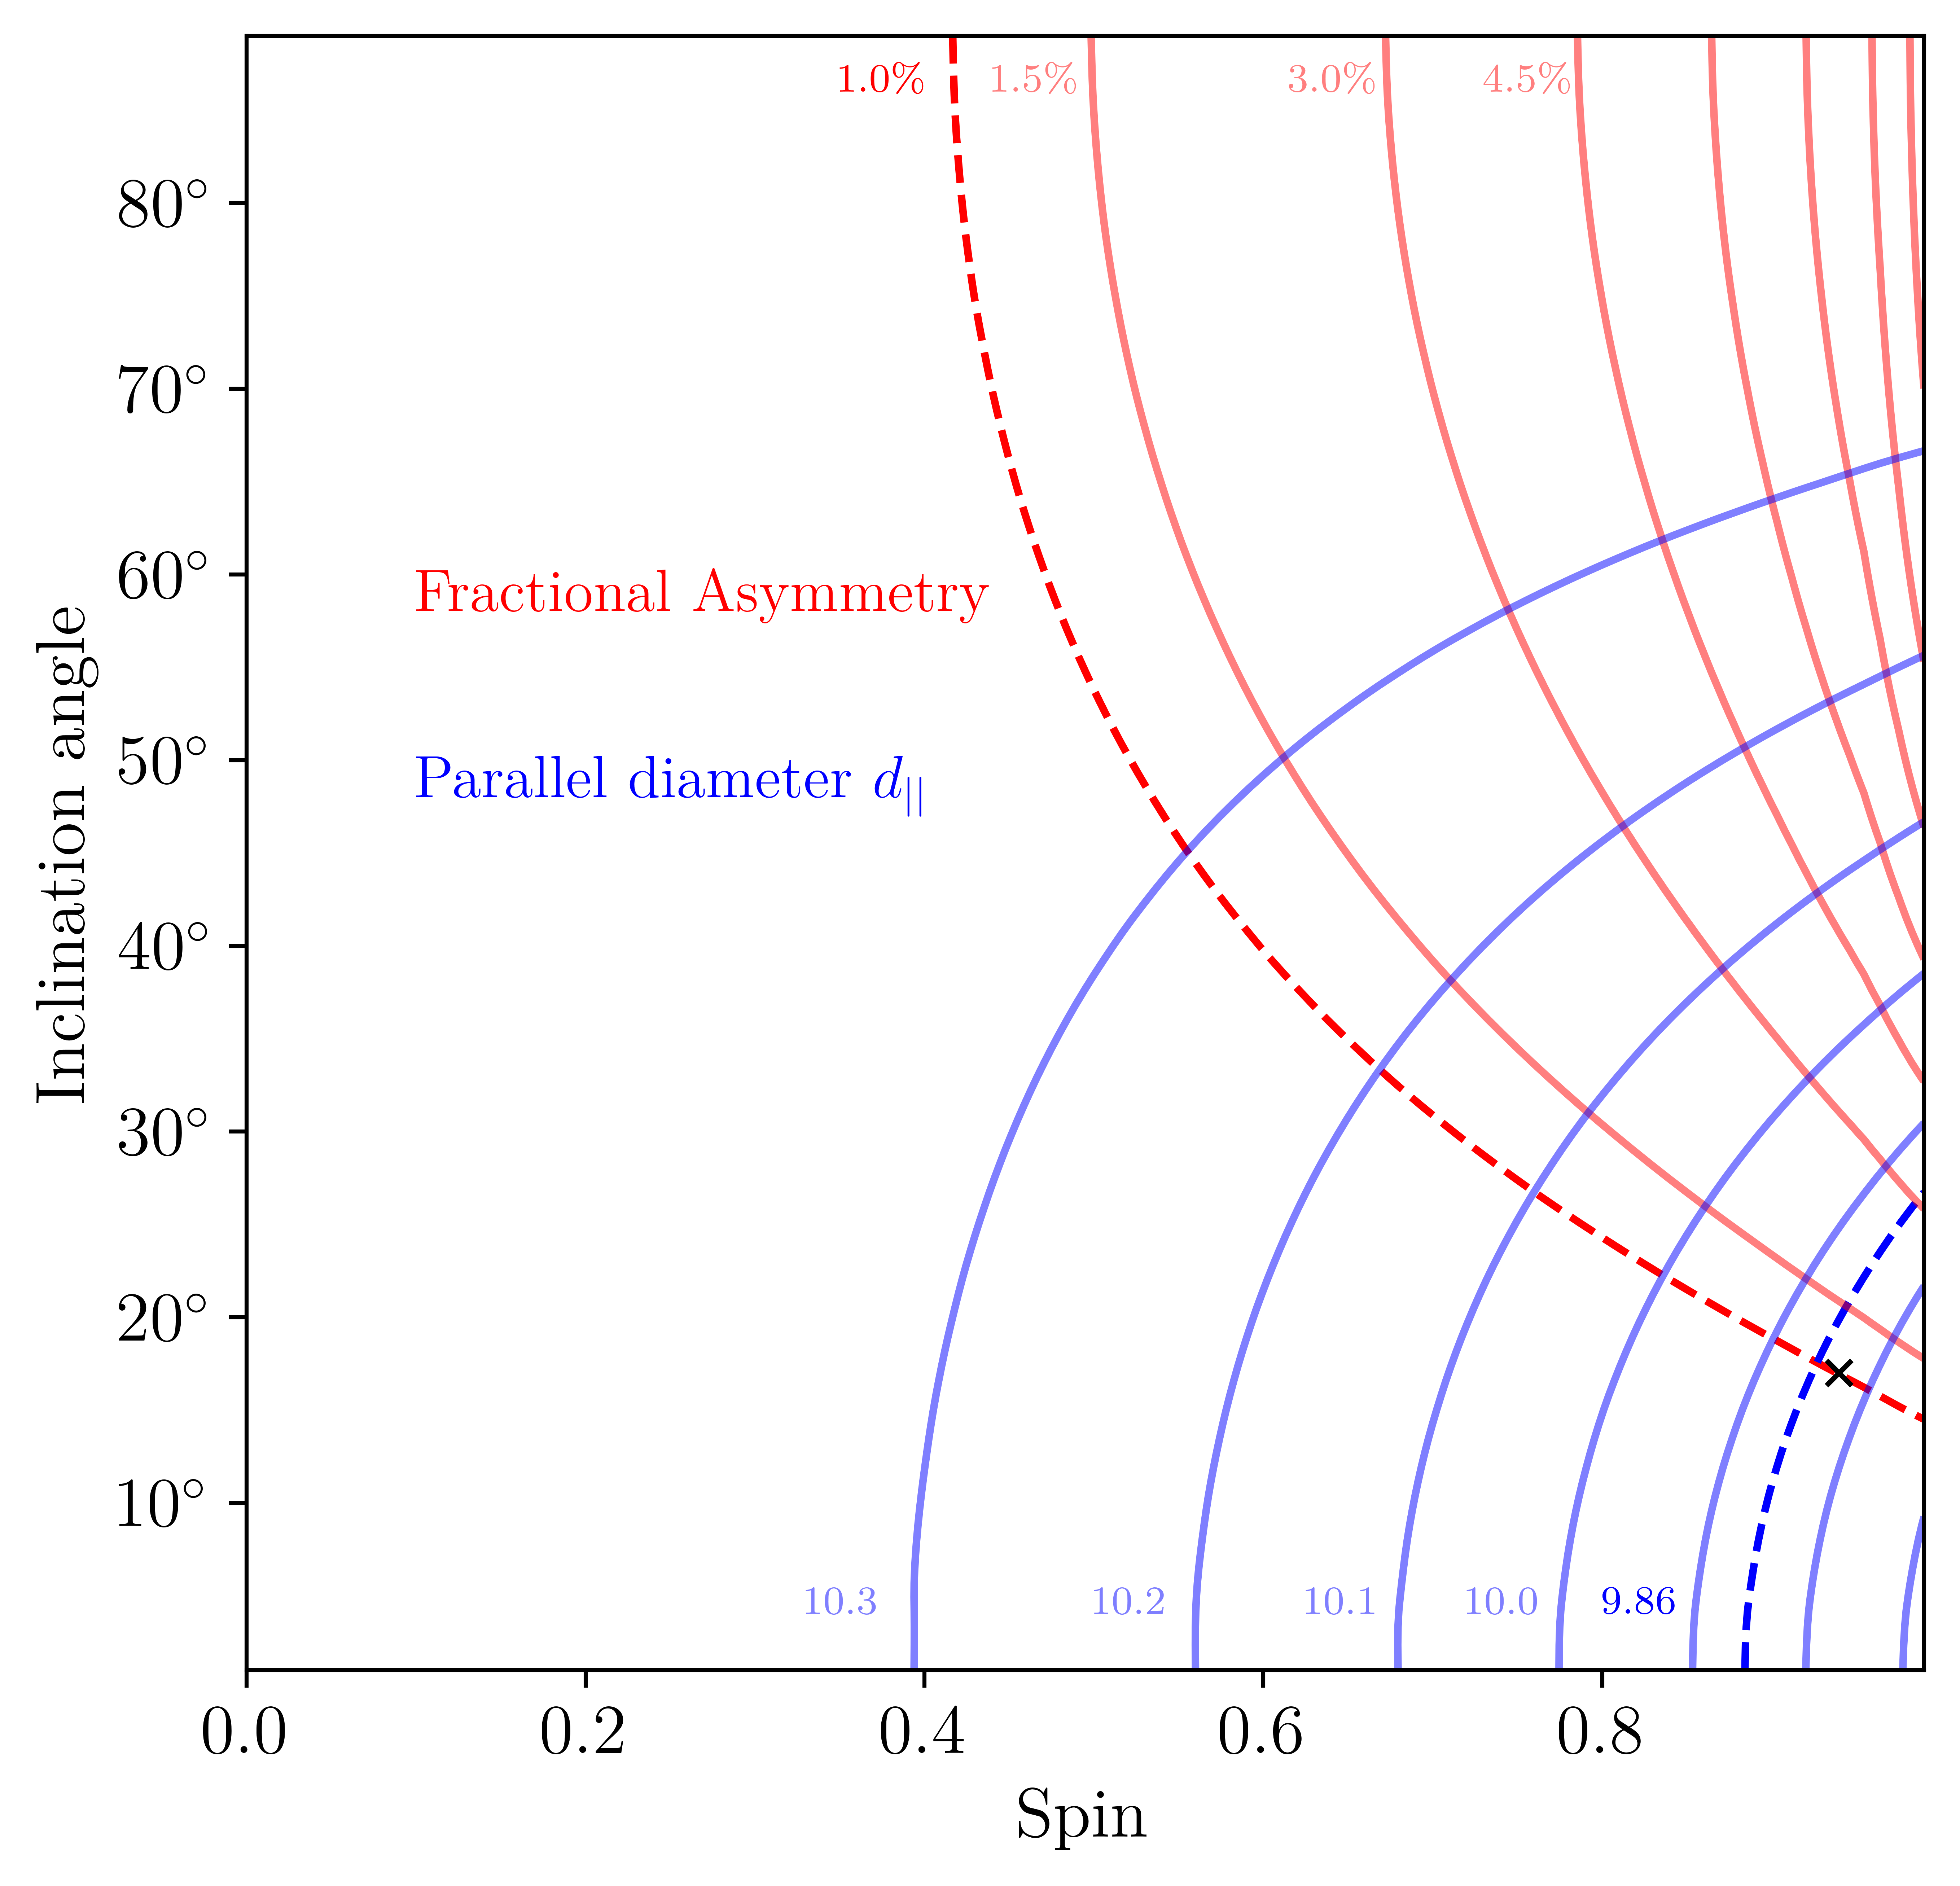

In [5]:
fig, ax = plt.subplots(figsize=(6,6),dpi=1000)
CS1 = ax.contour(Asm, Ism, np.transpose(Fsm), colors='r',levels=[1.0144189711506879],linestyles="dashed")
# positions1 = [(0.40,83), (0.62,83), (0.81,83)]
# labels1 = ax.clabel(CS1, inline=True, fontsize=6, fmt='%.1f %%', manual=positions1)
CS2 = ax.contour(Asm, Ism, np.transpose(Dsm), colors='b',levels=[9.85566243626449],linestyles="dashed")
# positions2 = [(0.40,6), (0.62, 6), (0.7, 6), (0.81,6), (0.85, 6), (0.9, 6)]
# labels2 = ax.clabel(CS2, inline=True, fontsize=6, manual=positions2)
CS3 = ax.contour(Asm, Ism, np.transpose(Fsm), colors='r',alpha=0.5)
CS4 = ax.contour(Asm, Ism, np.transpose(Dsm), colors='b',alpha=0.5)
ax.set_xlabel('Spin', size=14)
ax.set_ylabel('Inclination angle', size=14)
# for l in labels1+labels2:
#     l.set_rotation(0)
ax.plot(0.94,17,"x",markersize=5,color="k")
plt.annotate('Fractional Asymmetry',(0.1,58), color='r', fontsize=12)
plt.annotate('1.5\%',(0.44,86), color='r', fontsize=8, alpha=0.5)
plt.annotate('3.0\%',(0.615,86), color='r', fontsize=8, alpha=0.5)
plt.annotate('4.5\%',(0.73,86), color='r', fontsize=8, alpha=0.5)
plt.annotate('Parallel diameter $d_{||}$',(0.1,48), color='b', fontsize=12)
plt.annotate('10.3',(0.33,4), color='b', fontsize=8, alpha=0.5)
plt.annotate('10.2',(0.5,4), color='b', fontsize=8, alpha=0.5)
plt.annotate('10.1',(0.625,4), color='b', fontsize=8, alpha=0.5)
plt.annotate('10.0',(0.72,4), color='b', fontsize=8, alpha=0.5)
plt.annotate('1.0\%', (0.35, 86), color='r', fontsize=8)
plt.annotate('9.86', (0.80, 4), color='b', fontsize=8)
plt.xticks(np.arange(0, 1.0, 0.2))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d$^{\circ}$'))
plt.savefig('contour_plot.pdf',dpi=1000,bbox_inches='tight')
plt.show()